In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels

In [2]:
path = 'fuel poverty.csv'
df = pd.read_csv(path)

In [3]:
# check some example numbers
df.head()

,Old Ward Code,New ward code,Ward,% Households without central heating - 2010,Indices of Deprivation 2010 Health Deprivation and Disability domain,% aged 60 or over - 2010,JSA claimant rate - 2010,Income Support rate - 2010,Cavity walls that are uninsulated (2010),Lofts with less than 150mm insulation (2010),% of households fuel poor (2009)
0,00AA,E09000001,City of London,4.6,-1.43,16.8,1.2,1.6,69.4,73.8,6.5
1,00ABFX,E05000026,Abbey,9.9,0.27,10.8,4.9,6.2,68.6,72.9,16.2
2,00ABFY,E05000027,Alibon,7.9,0.56,17.0,6.5,10.8,64.9,73.5,18.9
3,00ABFZ,E05000028,Becontree,11.7,0.46,13.2,5.9,7.8,58.4,73.3,17.3
4,00ABGA,E05000029,Chadwell Heath,14.7,0.46,24.5,5.5,8.8,69.4,66.3,16.8


In [4]:
# print the shape of the DataFrame
df.shape

(677, 11)

In [5]:
# print the column names
df.columns

Index(['Old Ward Code', 'New ward code', 'Ward',
       '% Households without central heating - 2010',
       'Indices of Deprivation 2010 Health Deprivation and Disability domain',
       '% aged 60 or over - 2010', 'JSA claimant rate - 2010',
       'Income Support rate - 2010',
       'Cavity walls that are uninsulated (2010)',
       'Lofts with less than 150mm insulation (2010)',
       '% of households fuel poor (2009)'],
      dtype='object')

In [8]:
# rename columns
df_rename = df.rename(columns = {'% Households without central heating - 2010':'heating',
                          'Indices of Deprivation 2010 Health Deprivation and Disability domain':'health',
                          '% aged 60 or over - 2010':'old',
                          'JSA claimant rate - 2010':'claimant',
                          'Income Support rate - 2010':'income',
                          'Cavity walls that are uninsulated (2010)':'walls',
                          'Lofts with less than 150mm insulation (2010)':'insulation',
                          '% of households fuel poor (2009)':'fuel'})
df_rename.columns

Index(['Old Ward Code', 'New ward code', 'Ward', 'heating', 'health', 'old',
       'claimant', 'income', 'walls', 'insulation', 'fuel'],
      dtype='object')

In [9]:
# pick the columns that we need
df_pick = df_rename.loc[:,['heating', 'health', 'old', 'claimant', 'income', 'walls', 'insulation', 'fuel']]

df_pick.columns

Index(['heating', 'health', 'old', 'claimant', 'income', 'walls', 'insulation',
       'fuel'],
      dtype='object')

In [10]:
# check datatype
df_pick.dtypes

heating       float64
health        float64
old           float64
claimant      float64
income        float64
walls         float64
insulation    float64
fuel          float64
dtype: object

<AxesSubplot:xlabel='insulation', ylabel='fuel'>

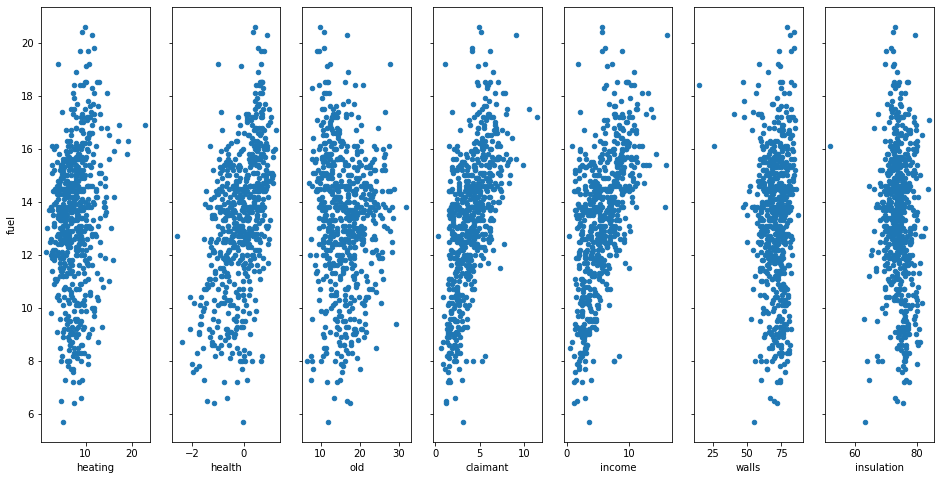

In [22]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 7, sharey=True)
df_pick.plot(kind='scatter', x='heating', y='fuel', ax=axs[0], figsize=(16, 8))
df_pick.plot(kind='scatter', x='health', y='fuel', ax=axs[1])
df_pick.plot(kind='scatter', x='old', y='fuel', ax=axs[2])
df_pick.plot(kind='scatter', x='claimant', y='fuel', ax=axs[3])
df_pick.plot(kind='scatter', x='income', y='fuel', ax=axs[4])
df_pick.plot(kind='scatter', x='walls', y='fuel', ax=axs[5])
df_pick.plot(kind='scatter', x='insulation', y='fuel', ax=axs[6])

In [19]:
df_pick.corr()

,heating,health,old,claimant,income,walls,insulation,fuel
heating,1.000000,0.287208,-0.408032,0.285139,0.278432,0.170786,0.389269,0.184951
health,0.287208,1.000000,-0.603663,0.776067,0.770857,-0.175603,0.012037,0.491723
old,-0.408032,-0.603663,1.000000,-0.516917,-0.471916,-0.013047,-0.216899,-0.065773
claimant,0.285139,0.776067,-0.516917,1.000000,0.897436,-0.109349,-0.043085,0.603741
income,0.278432,0.770857,-0.471916,0.897436,1.000000,-0.186220,0.017965,0.568301
walls,0.170786,-0.175603,-0.013047,-0.109349,-0.186220,1.000000,0.429038,-0.004484
insulation,0.389269,0.012037,-0.216899,-0.043085,0.017965,0.429038,1.000000,-0.070122
fuel,0.184951,0.491723,-0.065773,0.603741,0.568301,-0.004484,-0.070122,1.000000


In [21]:
# This performs a multiple regression of expectancy against recycling:

reg_income = smf.ols(formula='fuel ~ heating + health + old + claimant + income + walls + insulation',data=df_pick).fit()

# And this gives a big summary of the results:
print(reg_income.summary())

                            OLS Regression Results                            
Dep. Variable:                   fuel   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     87.10
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           7.58e-88
Time:                        23:05:18   Log-Likelihood:                -1277.2
No. Observations:                 625   AIC:                             2570.
Df Residuals:                     617   BIC:                             2606.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5109      1.957      2.816      0.0

In [23]:
# conditional number is large, so calculating VIF to check are there strong multicollinearity
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df_pick, thresh=5):
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_pick_with_const = add_constant(df_pick)

        vif_df_pick = pd.Series([variance_inflation_factor(df_pick_with_const.values, i) 
               for i in range(df_pick_with_const.shape[1])], name= "VIF",
              index=df_pick_with_const.columns).to_frame()

        # drop the const
        vif_df_pick = vif_df_pick.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df_pick.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df_pick.index[vif_df_pick.VIF == vif_df_pick.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df_pick = df_pick.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df_pick

In [26]:
# delete inf and nan
df_pick[np.isnan(df_pick)] = 0
df_pick[np.isinf(df_pick)] = 0

In [27]:
# drop columns that are strong multicollinearity
df_drop = drop_column_using_vif_(df_pick.drop('fuel', axis=1))

df_drop.head()

Dropping: insulation
Dropping: claimant


,heating,health,old,income,walls
0,4.6,-1.43,16.8,1.6,69.4
1,9.9,0.27,10.8,6.2,68.6
2,7.9,0.56,17.0,10.8,64.9
3,11.7,0.46,13.2,7.8,58.4
4,14.7,0.46,24.5,8.8,69.4


In [29]:
# fit a linear regression model
import statsmodels.api as sm

life_expect = sm.OLS(endog=df_pick[['fuel']], exog=sm.add_constant(df_drop)).fit()
life_expect.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fuel   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     548.3
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          3.58e-234
Time:                        23:09:54   Log-Likelihood:                -1403.3
No. Observations:                 677   AIC:                             2819.
Df Residuals:                     671   BIC:                             2846.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3338      0.258      1.292      0.197      -0.174       0.841
heating        0.0850      0.029      2.973      0.003       0.029       0.141
health         1.4758      0.192      7.674      0.000       1.098       1.853
old            0.2627      0.018     14.330      0.000       0.227       0.299
income         0.4772      0.040     11.902      0.000       0.398       0.556
walls          0.0791      0.006     12.601      0.000       0.067       0.091
==============================================================================
Omnibus:                       30.853   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.429
Skew:                           0.407   Prob(JB):                     6.12e-10
Kurtosis:                       3.918   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""